### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly,plotly.express as px
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [33]:
from google.colab import files
uploaded = files.upload()

Saving admission.csv to admission (1).csv


In [87]:
data=pd.read_csv('admission.csv')
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
data.shape

(500, 9)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [37]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

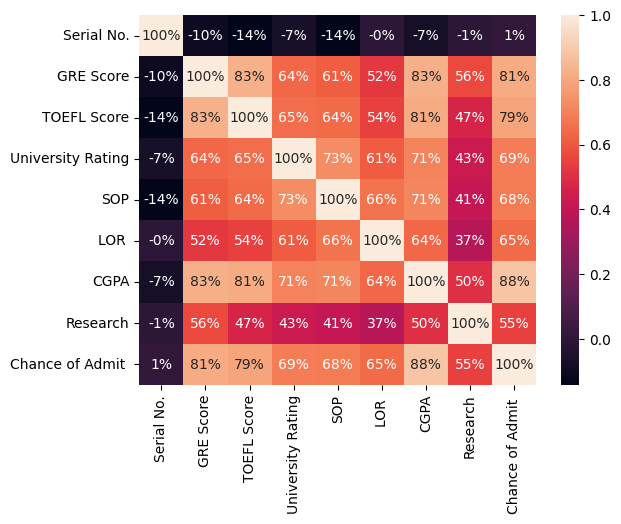

In [39]:
sns.heatmap(data.corr(),annot=True, fmt = '.0%')

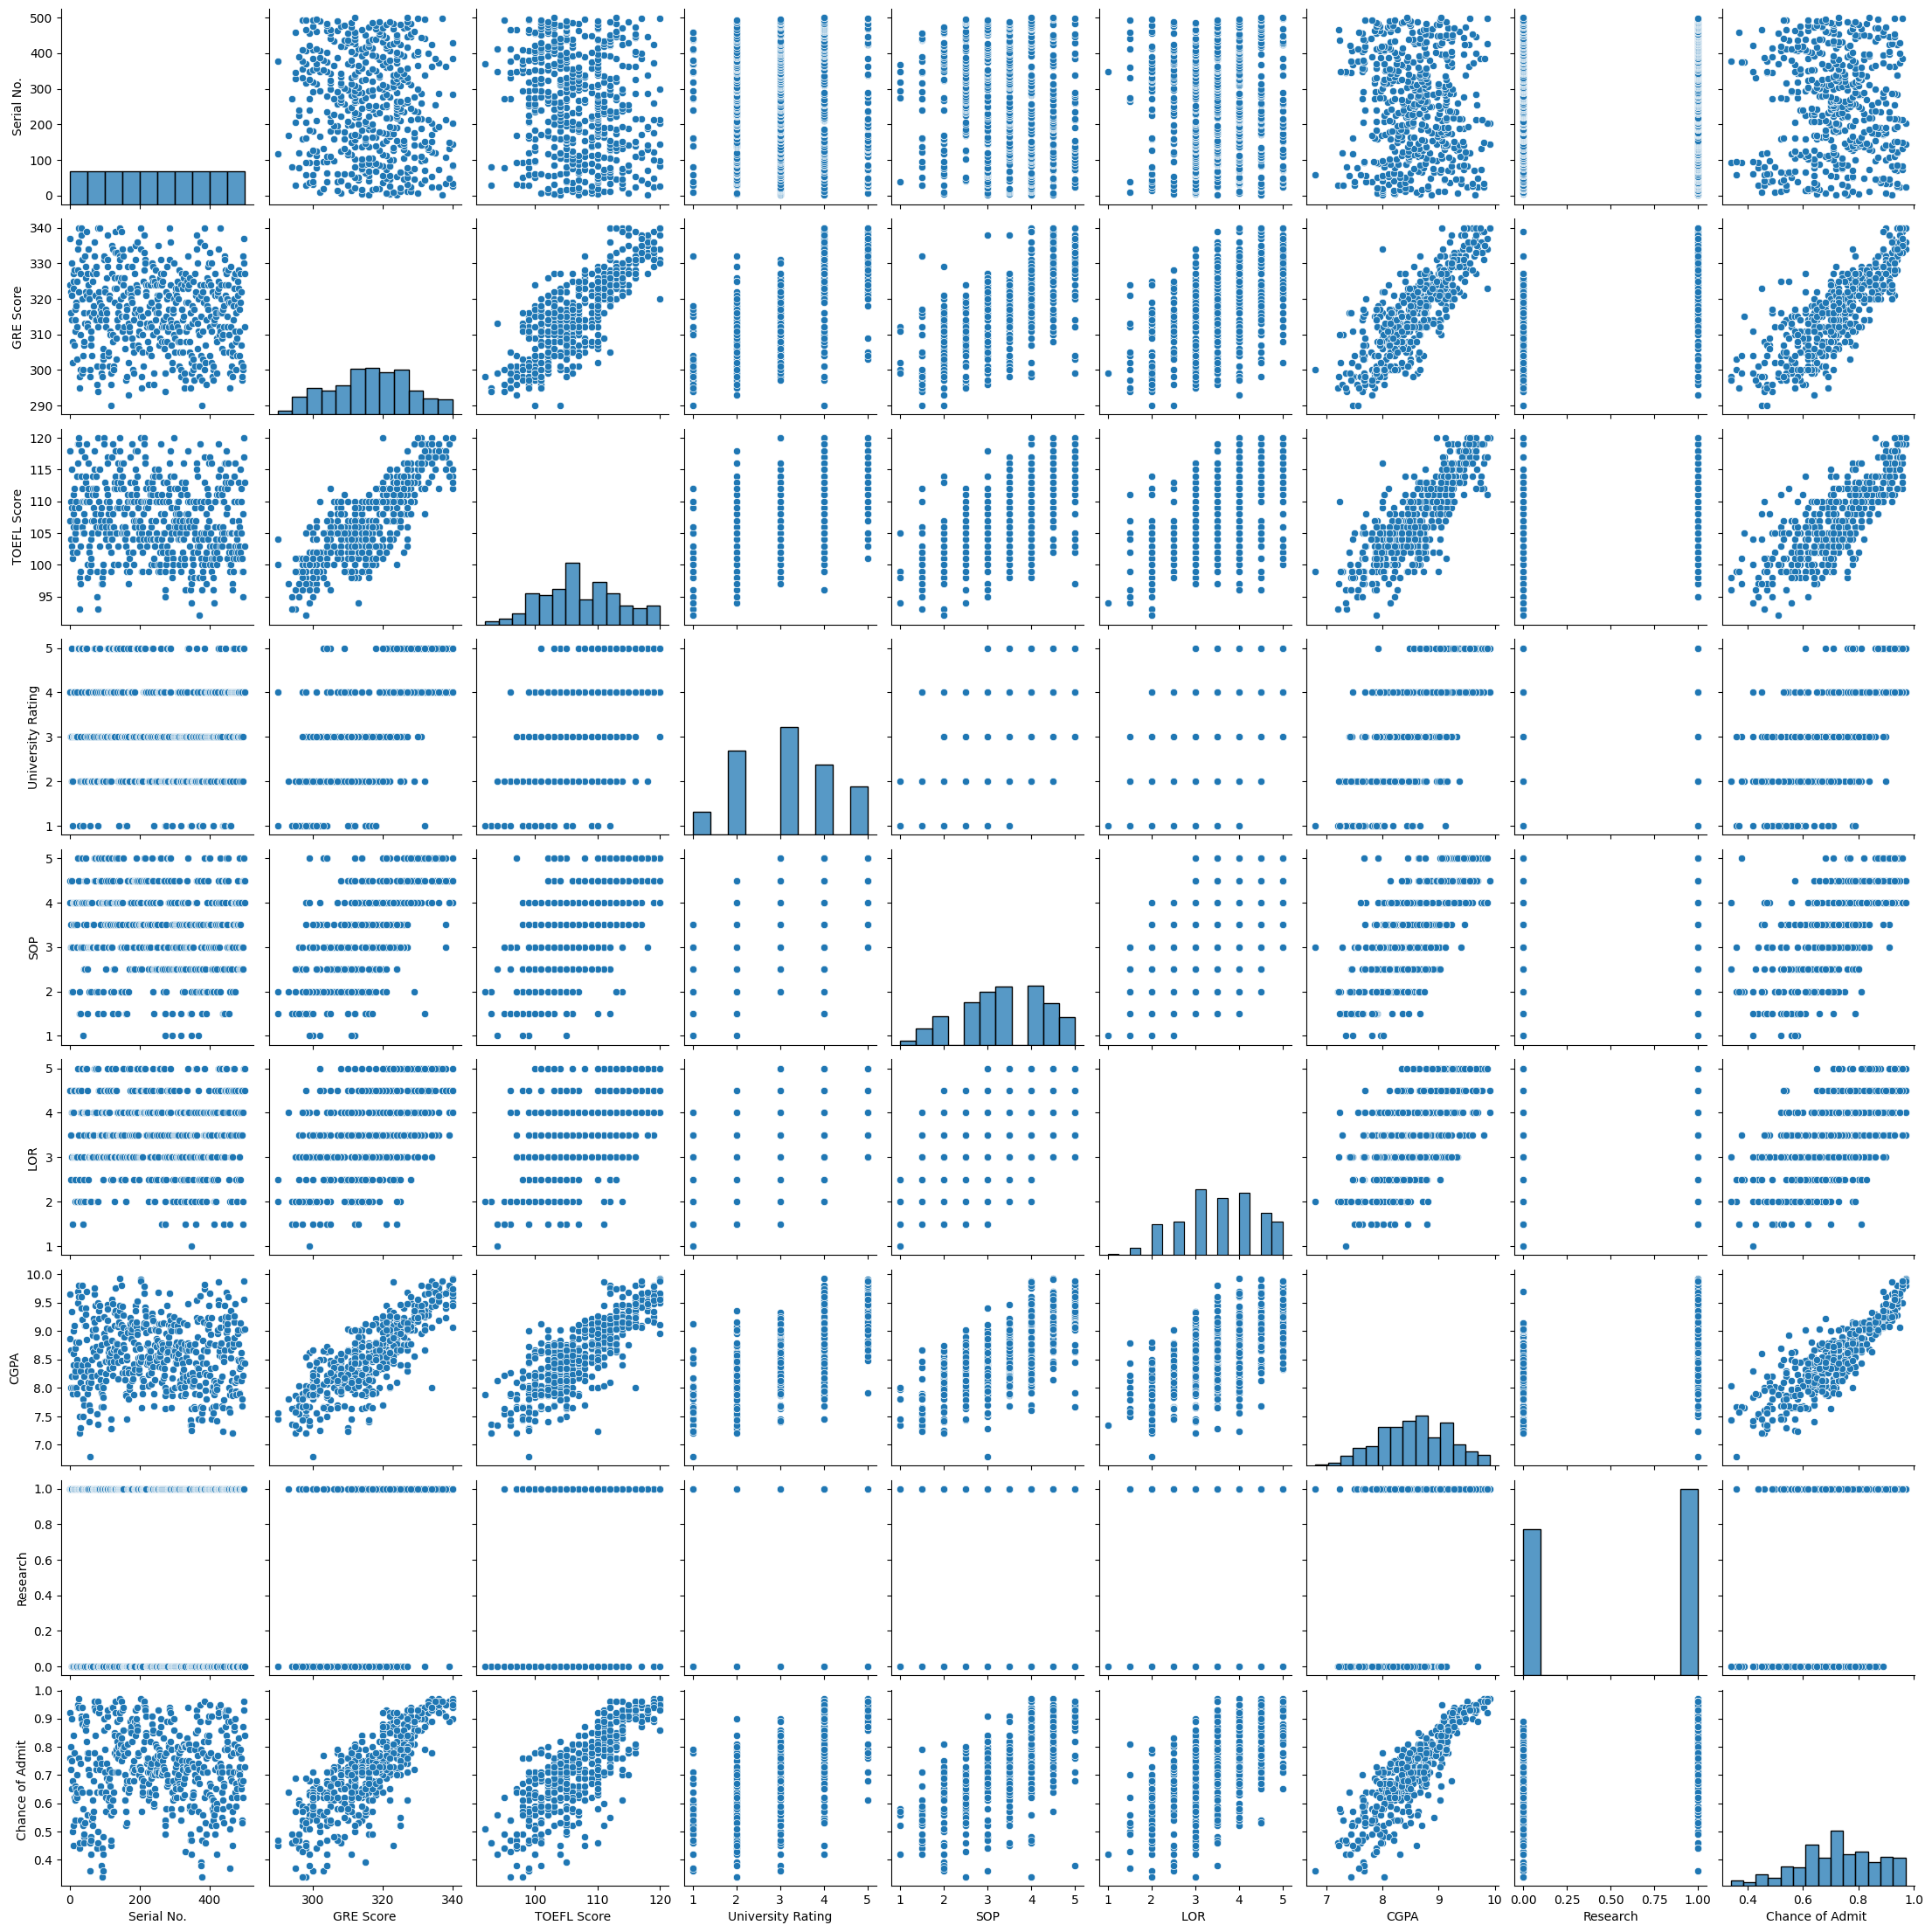

In [40]:
sns.pairplot(data)
plt.show()

### Q.2 Find out the minimum and maximum values for GRE score


In [41]:
print(data['GRE Score'].max())
print(data['GRE Score'].min())

340
290


### Q.3 Find out the percentage of universities for each university rating

In [42]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1])

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64
[4 3 2 5 1]


<Axes: ylabel='University Rating'>

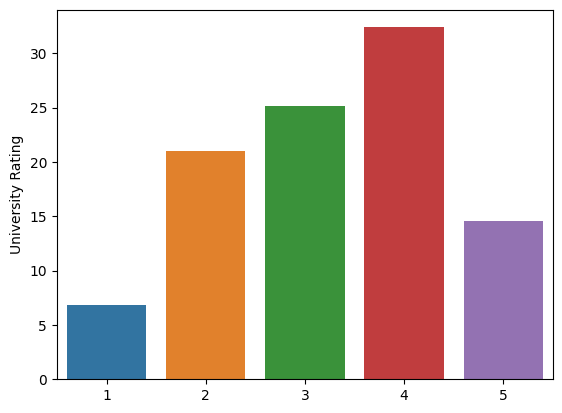

In [109]:
ratings=data['University Rating'].value_counts()
percentage=ratings/len(ratings)
print(percentage)
print(data['University Rating'].unique())


sns.barplot(x=data['University Rating'].unique(),y=percentage,data=data)
# fig=px.bar(data,x=data['University Rating'].unique(),y=percentage,labels={
#                      "x": "University Rating",
#                      "y": "Percentage",
#                  })
# fig.update_layout(title="University Rating in %")
# fig.show()

### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [66]:
data['Chance of Admit ']=np.where(data['Chance of Admit ']>0.80,1,0)



In [67]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [68]:
from sklearn.model_selection import train_test_split

X=data.drop(['Chance of Admit ','Serial No.'],axis=1)
Y=data['Chance of Admit ']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [106]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=2)

dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [107]:
dtc.score(x_train,y_train)

0.9325

In [108]:
dtc.score(x_test,y_test)

0.93